### Problem Statement
- Make a decision on a loan application when it's received based on the risk factors
- Should not reject an application if the applicant has the potential to repay the loan
- Should not approve an application if the applicant could possibly default

### Results Expected
- Submit well commented python code used for data analysis
    - Explain different types of analsis done on the data to derive at a conclusion
- Create a presentation
    - Include the results of univariate, bivariate analysis etc.
    - Include visual graphs and charts in the presentation

### Lending Club Case Study

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Set themes, styles and color palette for seaborn charts

In [107]:
sns.set_theme(style='darkgrid', context='paper')
sns.set_palette(palette='pastel')

plt.rcParams["figure.figsize"] = (5, 3) 
plt.rcParams["axes.titlesize"] = 14 
plt.rcParams["axes.labelsize"] = 12 
plt.rcParams["xtick.labelsize"] = 10 
plt.rcParams["ytick.labelsize"] = 10 

Load the data from loan.csv file. Using the read_csv function from the pandas library, we can load the data from the csv to a pandas dataframe.

In [108]:
df = pd.read_csv('Data/loan.csv', low_memory=False)

The first thing I would like to do is to check the shape of the data frame. The shape property of the pandas data frame returns a tuple representing the dimension of the frame. ie., the rows and columns.

In [109]:
df.shape

(39717, 111)

After the shape property, the next step is to use the head function on the data frame to take a look into the first 5 records. This will give a rough understanding of the data.

In our case, we know we have 111 columns, but pandas doesn't show all the columns by default.

In [110]:
# Configuring pandas to show all our columns
pd.set_option('display.max_columns', None)

In [111]:
df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Using the describe function on the data frame to get a rough understanding of all the numeric columns in the data set

In [112]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

Get the data types of each column to see if the data is in the right format or need to be casted.

In [113]:
df.dtypes.to_dict()

{'id': dtype('int64'),
 'member_id': dtype('int64'),
 'loan_amnt': dtype('int64'),
 'funded_amnt': dtype('int64'),
 'funded_amnt_inv': dtype('float64'),
 'term': dtype('O'),
 'int_rate': dtype('O'),
 'installment': dtype('float64'),
 'grade': dtype('O'),
 'sub_grade': dtype('O'),
 'emp_title': dtype('O'),
 'emp_length': dtype('O'),
 'home_ownership': dtype('O'),
 'annual_inc': dtype('float64'),
 'verification_status': dtype('O'),
 'issue_d': dtype('O'),
 'loan_status': dtype('O'),
 'pymnt_plan': dtype('O'),
 'url': dtype('O'),
 'desc': dtype('O'),
 'purpose': dtype('O'),
 'title': dtype('O'),
 'zip_code': dtype('O'),
 'addr_state': dtype('O'),
 'dti': dtype('float64'),
 'delinq_2yrs': dtype('int64'),
 'earliest_cr_line': dtype('O'),
 'inq_last_6mths': dtype('int64'),
 'mths_since_last_delinq': dtype('float64'),
 'mths_since_last_record': dtype('float64'),
 'open_acc': dtype('int64'),
 'pub_rec': dtype('int64'),
 'revol_bal': dtype('int64'),
 'revol_util': dtype('O'),
 'total_acc': dtyp

Note: We may not need all the columns to do our analysis. Let us first remove the columns which are not required for the analysis, before updating the data type.

Find columns with a lot of null values. These columns will not be helpful in data analysis. Hence find and remove columns with a considerable percentage of null values.

In [114]:
df.shape

(39717, 111)

In [115]:
# Get the columns in the decending order of most number of null values 
df.isnull().sum().sort_values(ascending=False)

verification_status_joint    39717
annual_inc_joint             39717
mo_sin_old_rev_tl_op         39717
mo_sin_old_il_acct           39717
bc_util                      39717
                             ...  
delinq_amnt                      0
policy_code                      0
earliest_cr_line                 0
delinq_2yrs                      0
id                               0
Length: 111, dtype: int64

In [116]:
# Get the percentage of null values on each column. 
columns_null_percentage = ((df.isnull().sum() / df.shape[0]) * 100).round(2).sort_values(ascending=False)

columns_null_percentage

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64

In [117]:
# Get only those columns which has less than 50% of null values
# Using the loc property of the data frame to get all rows and those columns which has less than 50% null values
df = df.loc[:, columns_null_percentage < 50]

df.shape

(39717, 54)

In [118]:
# Up for cleanup
df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [119]:
# Up for cleanup
df.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
initial_list_status               1
collections_12_mths_ex_med        1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

Remove all the columns with just one value accross all the rows. These columns won't be useful in analyzing the data.

In [120]:
df = df.loc[:, df.nunique() != 1]

df.shape

(39717, 45)

Identify and remove those columns which has less significance in achieving the objective. 

Note: The core objective is to identify the risk in approving or rejecting a loan application.

In [121]:
df['home_ownership'].value_counts()

home_ownership
RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: count, dtype: int64

In [122]:
# Using the drop function to drop a list of columns in axis 1. Note: By default the axis is 0 which represents rows.
df = df.drop([
    'id', 'member_id', 'emp_title', 'url', 'desc', 'zip_code', 'out_prncp_inv', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 
    'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'title'
], axis=1)

In [123]:
df.columns.size

29

We have got down to 32 columns from 111 columns. We can move to the next step and improve the quality of data.

### Find the null values in the data and take necessary action

In [124]:
df.isnull().sum().sort_values(ascending=False)

emp_length              1075
pub_rec_bankruptcies     697
revol_util                50
last_credit_pull_d         2
addr_state                 0
total_pymnt                0
out_prncp                  0
total_acc                  0
revol_bal                  0
pub_rec                    0
open_acc                   0
inq_last_6mths             0
earliest_cr_line           0
delinq_2yrs                0
dti                        0
loan_amnt                  0
funded_amnt                0
loan_status                0
issue_d                    0
verification_status        0
annual_inc                 0
home_ownership             0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt_inv            0
purpose                    0
dtype: int64

There are 697 records which has null value in pub_rec_backruptcies (Number of public record bankruptcies). In this case null value implies the applicant hasn't filed for bankruptcy in the past. Hence we can replace null values with 0.

In [125]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(value=0)
df['pub_rec_bankruptcies'].isnull().sum()

0

Revolving utilization of credit is stored in a column of type string. The value can be converted to float and be used in numeric data analysis. The lesser the credit utilized shows the applicant is not too dependent on credit.

Also there are only 50 records with null or empty values in the column across rows, which accounts to less than 0.4% of the total records. We can safely drop these records for our analysis.

In [126]:
df['revol_util'] = df['revol_util'].str.rstrip('%').astype('float')
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float')

In [127]:
null_revol_util = df['revol_util'].isnull()
null_revol_util.index

RangeIndex(start=0, stop=39717, step=1)

In [128]:
# Call the reset index with drop attribute set to true, to drop the old index and set the new index with the right sequence.
df = df.drop(df[null_revol_util].index).reset_index(drop=True)

Over 1,000 records have null values in the `emp_length` column. Despite this, loans were offered to these applicants, suggesting they had alternative income sources. We’ll use `earliest_cr_line` data to analyze the performance of these loans.

In [129]:
df['emp_length'].value_counts()

emp_length
10+ years    8878
< 1 year     4571
2 years      4383
3 years      4091
4 years      3429
5 years      3278
1 year       3234
6 years      2226
7 years      1770
8 years      1477
9 years      1258
Name: count, dtype: int64

In [130]:
df['d_earliest_cr_line_month'] = df['earliest_cr_line'].str[:3]
df['d_earliest_cr_line_year'] = df['earliest_cr_line'].str[-2:].astype('int')

df[['d_earliest_cr_line_month', 'd_earliest_cr_line_year']].head()

,d_earliest_cr_line_month,d_earliest_cr_line_year
0,Jan,85
1,Apr,99
2,Nov,1
3,Feb,96
4,Jan,96


In [131]:
df['d_earliest_cr_line_year'].dtype

dtype('int32')

In [132]:
df['d_earliest_cr_line_year'] = df['d_earliest_cr_line_year'].apply(lambda x: 2000 + x if x <= 24 else 1900 + x)

df[['d_earliest_cr_line_month', 'd_earliest_cr_line_year']].head()

,d_earliest_cr_line_month,d_earliest_cr_line_year
0,Jan,1985
1,Apr,1999
2,Nov,2001
3,Feb,1996
4,Jan,1996


Let us include `d_earliest_cr_line_year` and `loan_status` to analyze the applicants who has empty values in `emp_length` column

In [133]:
df['loan_status'].value_counts()

loan_status
Fully Paid     32916
Charged Off     5611
Current         1140
Name: count, dtype: int64

In [134]:
df_temp = df[['d_earliest_cr_line_year', 'loan_status']][df['emp_length'].isnull()].value_counts().reset_index()
df_temp.columns

Index(['d_earliest_cr_line_year', 'loan_status', 'count'], dtype='object')

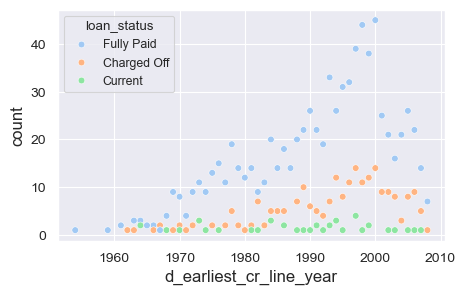

In [135]:
sns.scatterplot(data=df_temp, x='d_earliest_cr_line_year', y='count', hue='loan_status')
plt.show()

All the applicants whose emp_length (Employment length in years) is null, could possibly be self-employed or free-lancers etc. The chart above shows their 'earliest_cr_line' is at least more than 10 years old and a considerable number of loans have been fully paid off.

Hence the null values in emp_length column can be updated to 10+ years.

In [136]:
df['emp_length'] = df['emp_length'].fillna(value='10+ years')

The next column with null values is `last_credit_pull_d`. There are only 2 records which has null value in the column. We can safely remove these two rows.

In [137]:
df[df['last_credit_pull_d'].isnull()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,last_credit_pull_d,pub_rec_bankruptcies,d_earliest_cr_line_month,d_earliest_cr_line_year
26010,5000,5000,5000.0,36 months,11.12,163.98,B,B3,5 years,RENT,96000.0,Not Verified,Sep-10,Charged Off,small_business,CA,4.04,0,Oct-97,0,4,0,7172,80.6,9,0.0,3362.960000,NaN,0.0,Oct,1997
39426,1000,1000,875.0,36 months,7.12,30.94,A,A1,< 1 year,MORTGAGE,120000.0,Not Verified,Dec-07,Fully Paid,other,CA,0.65,0,Jul-97,1,7,0,2227,3.8,37,0.0,1110.813028,NaN,0.0,Jul,1997


In [138]:
null_last_credit_pull_d = df['last_credit_pull_d'].isnull()
df[null_last_credit_pull_d].index

Index([26010, 39426], dtype='int64')

In [139]:
df = df.drop(df[null_last_credit_pull_d].index).reset_index(drop=True)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39665 entries, 0 to 39664
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 39665 non-null  int64  
 1   funded_amnt               39665 non-null  int64  
 2   funded_amnt_inv           39665 non-null  float64
 3   term                      39665 non-null  object 
 4   int_rate                  39665 non-null  float64
 5   installment               39665 non-null  float64
 6   grade                     39665 non-null  object 
 7   sub_grade                 39665 non-null  object 
 8   emp_length                39665 non-null  object 
 9   home_ownership            39665 non-null  object 
 10  annual_inc                39665 non-null  float64
 11  verification_status       39665 non-null  object 
 12  issue_d                   39665 non-null  object 
 13  loan_status               39665 non-null  object 
 14  purpos

In [141]:
# Find all the columns which has 50 or less unique values
df.loc[:, df.nunique() <= 50].nunique()

term                         2
grade                        7
sub_grade                   35
emp_length                  11
home_ownership               5
verification_status          3
loan_status                  3
purpose                     14
addr_state                  50
delinq_2yrs                 11
inq_last_6mths               9
open_acc                    40
pub_rec                      5
pub_rec_bankruptcies         3
d_earliest_cr_line_month    12
dtype: int64

In [142]:
# Convert the columns with values which can be grouped to category type
df[['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'd_earliest_cr_line_month']] = \
df[['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'd_earliest_cr_line_month']].astype('category')

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,last_credit_pull_d,pub_rec_bankruptcies,d_earliest_cr_line_month,d_earliest_cr_line_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,0.00,5863.155187,May-16,0.0,Jan,1985
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,0.00,1008.710000,Sep-13,0.0,Apr,1999
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,0.00,3005.666844,May-16,0.0,Nov,2001
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,0.00,12231.890000,Apr-16,0.0,Feb,1996
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,15,0,27783,53.9,38,524.06,3513.330000,May-16,0.0,Jan,1996


### Find Outliers

Explore some of the key numeric columns to identify outliers

In [143]:
def getOutliers(col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col_name] < lower_bound) | (df[col_name] > upper_bound)]

    return len(outliers), lower_bound, upper_bound

In [144]:
annual_inc_outliers_len, annual_inc_lb, annual_inc_up = getOutliers('annual_inc')

print(annual_inc_outliers_len)

1842


In [145]:
# Removing the outliers from annual income column
df = df[(df['annual_inc'] >= annual_inc_lb) & (df['annual_inc'] <= annual_inc_up)].reset_index(drop=True)

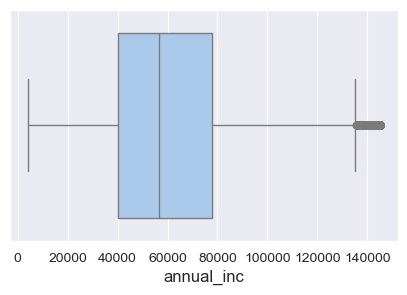

In [146]:
sns.boxplot(data=df, x='annual_inc')
plt.show()

In [147]:
loan_amnt_outliers_len, loan_amnt_lb, loan_amnt_up = getOutliers('loan_amnt')

print(loan_amnt_outliers_len)

924


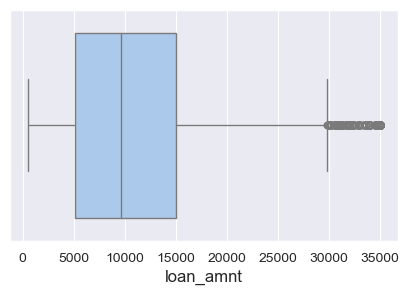

In [148]:
sns.boxplot(data=df, x='loan_amnt')
plt.show()

### Univariate Analysis

Each column in the data frame can give some insights. As part of EDA let us explore the patterns of a few columns in the data frame.

In [149]:
numeric_columns = df.select_dtypes(include='number').columns
print(numeric_columns)

categoric_columns = df.select_dtypes(include='category').columns
print(categoric_columns)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'total_pymnt', 'pub_rec_bankruptcies',
       'd_earliest_cr_line_year'],
      dtype='object')
Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'addr_state',
       'd_earliest_cr_line_month'],
      dtype='object')


In [150]:
def univariate_analysis(data, x_num_column, x_label, showKde=True):
    sns.histplot(data=data, x=x_num_column, kde=showKde, bins=50)
    plt.title(f"Univariate Analysis: on '{x_label}'")
    plt.xlabel(x_label)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()  

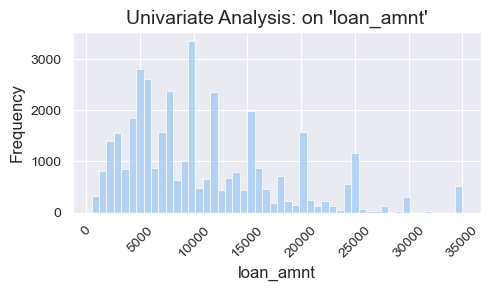

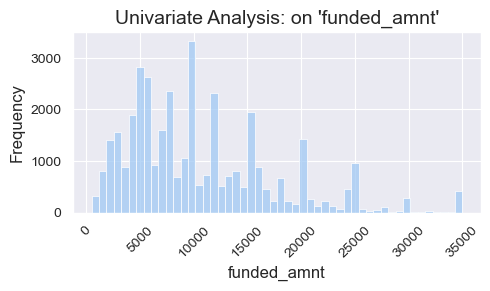

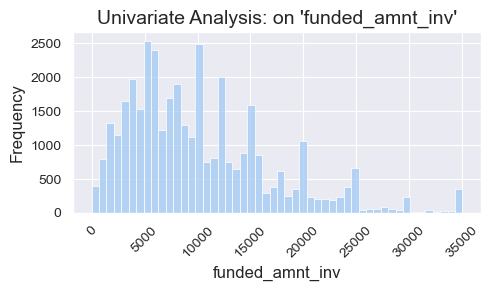

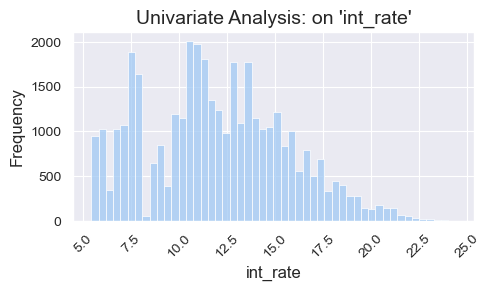

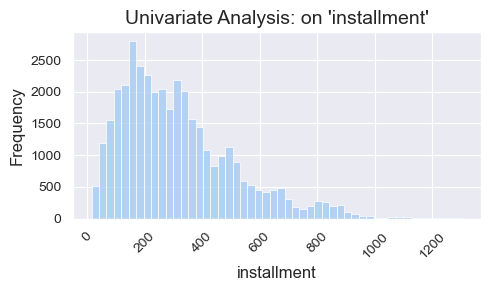

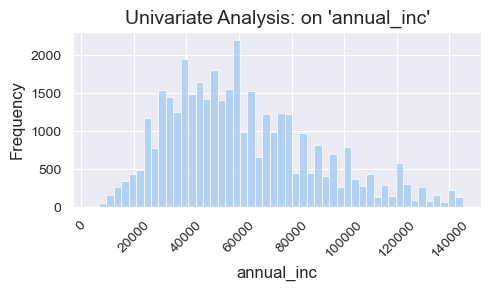

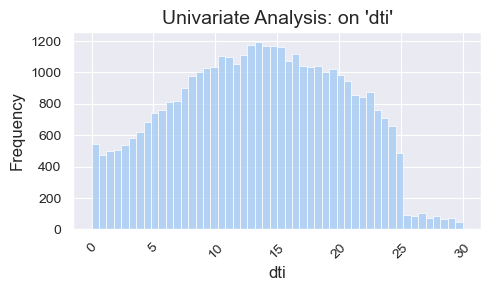

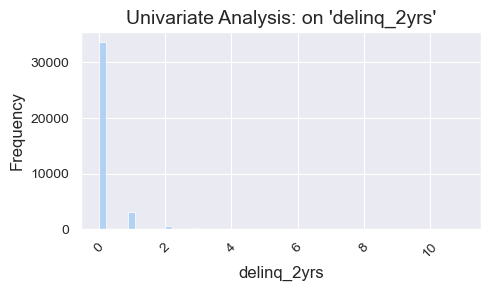

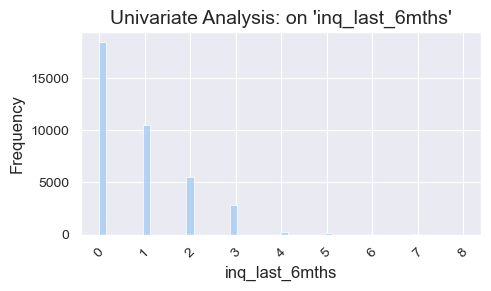

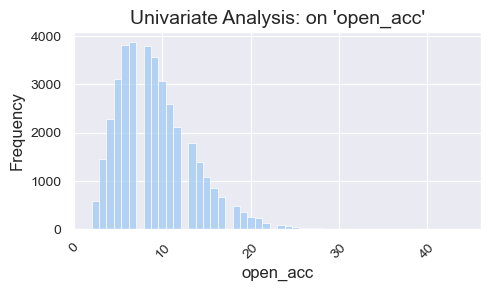

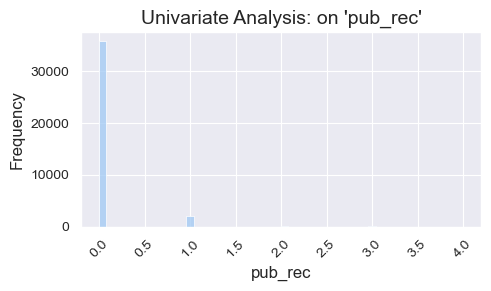

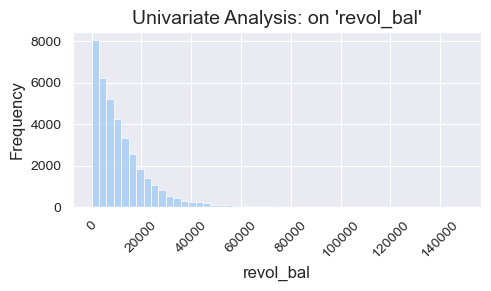

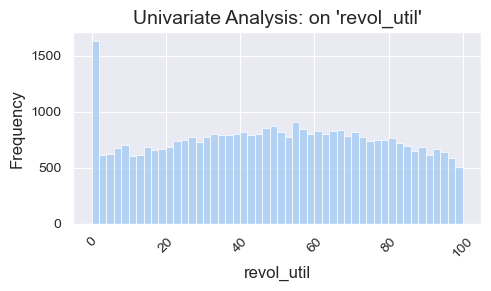

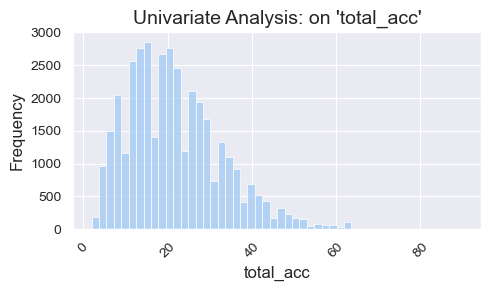

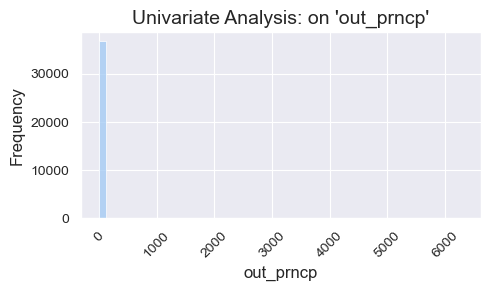

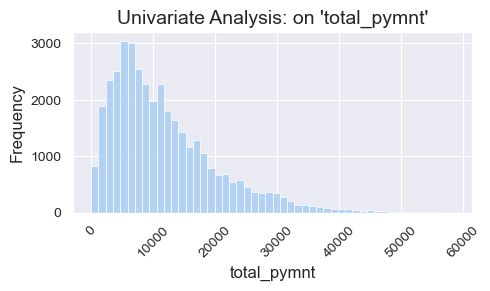

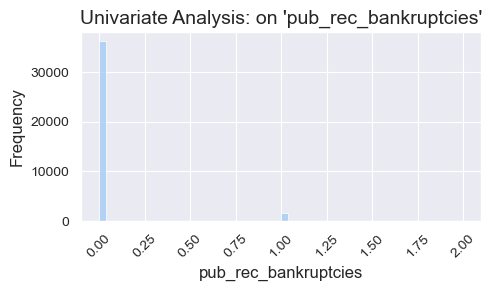

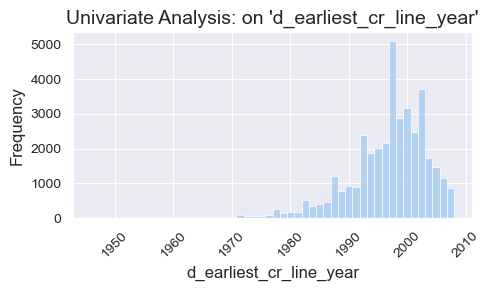

In [151]:
for num_col in numeric_columns:
    univariate_analysis(df, num_col, num_col, False)


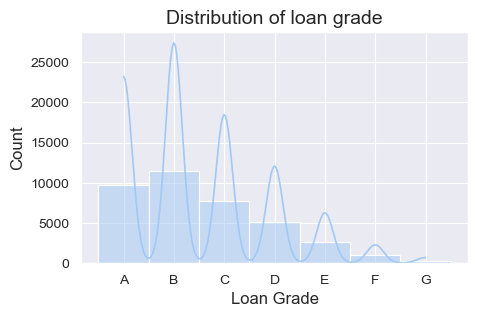

In [152]:
uni_hist = sns.histplot(x=df['grade'].sort_values(), kde=True)

uni_hist.set_title('Distribution of loan grade')
uni_hist.set_xlabel('Loan Grade')
uni_hist.set_ylabel('Count')

plt.show()

### Segmented Univariate Analysis

In [153]:
def segmented_univariate_analysis(data, x_category, y_numeric, x_label, y_label):
    sns.boxplot(data=data, x=x_category, y=y_numeric)
    plt.title(f"Segmented Univariate Analysis: {x_label} by {y_label}")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()   

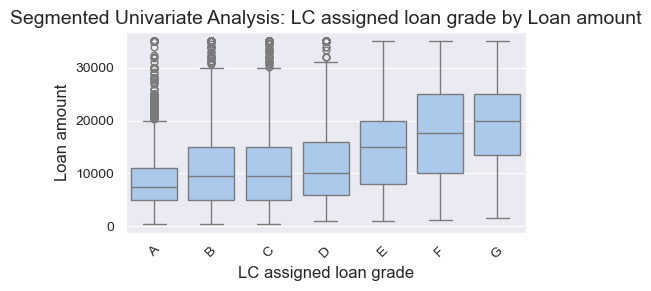

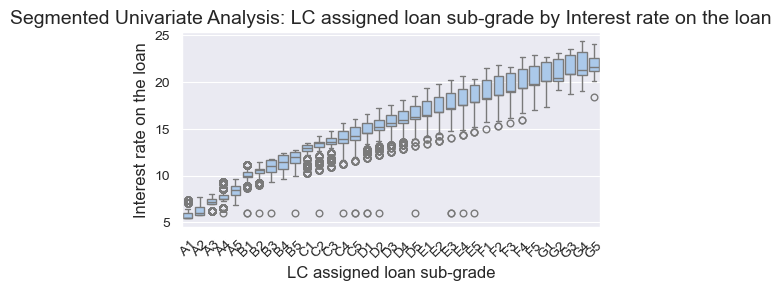

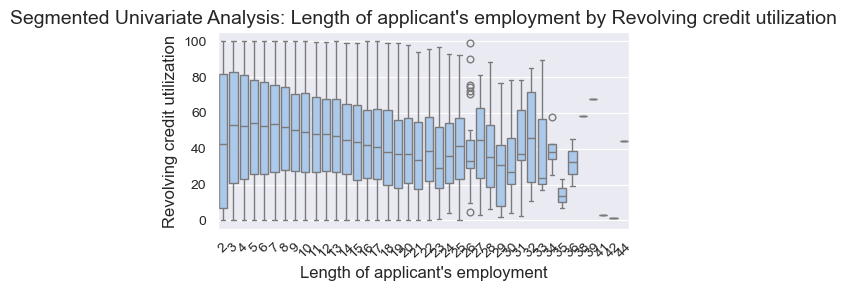

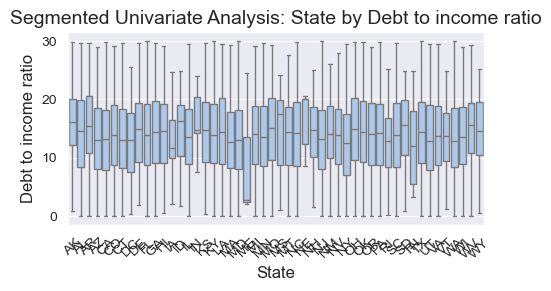

In [154]:
segmented_univariate_analysis(df, x_category='grade', y_numeric='loan_amnt', x_label='LC assigned loan grade', y_label='Loan amount')
segmented_univariate_analysis(df, x_category='sub_grade', y_numeric='int_rate', x_label='LC assigned loan sub-grade', y_label='Interest rate on the loan')
segmented_univariate_analysis(df, x_category='open_acc', y_numeric='revol_util', x_label='Length of applicant\'s employment', y_label='Revolving credit utilization')
segmented_univariate_analysis(df, x_category='addr_state', y_numeric='dti', x_label='State', y_label='Debt to income ratio')

### Bivariate Analysis

In [155]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'total_pymnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'd_earliest_cr_line_month',
       'd_earliest_cr_line_year'],
      dtype='object')

<Axes: xlabel='loan_amnt', ylabel='annual_inc'>

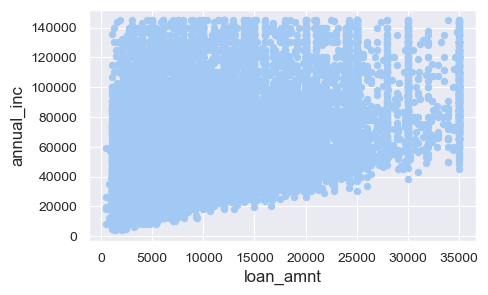

In [156]:
df.plot(kind='scatter', x='loan_amnt', y='annual_inc')